In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"


# ***We have done this once and no need to do again***

In [ ]:
# !kaggle datasets list -s pneumonia

In [ ]:
# # Make dataset folder in Drive
# !mkdir -p /content/drive/MyDrive/Pneumonia-Detection/data

# # Download the dataset directly to Drive
# !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p /content/drive/MyDrive/Pneumonia-Detection/data


In [ ]:
# import zipfile

# zip_path = "/content/drive/MyDrive/Pneumonia-Detection/data/chest-xray-pneumonia.zip"
# extract_to = "/content/drive/MyDrive/Pneumonia-Detection/data/"

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print("✅ Dataset extracted successfully!")


# ***Folder Structure***

In [ ]:
# Set dataset path to use later
base_dir = '/content/drive/MyDrive/Pneumonia-Detection/data/chest_xray'

In [ ]:
import shutil

for split in ['train', 'val', 'test']:
    pneu_dir = os.path.join(base_dir, split, 'PNEUMONIA')
    if not os.path.exists(pneu_dir):
        continue

    bacterial = os.path.join(base_dir, split, 'BACTERIAL_PNEUMONIA')
    viral = os.path.join(base_dir, split, 'VIRAL_PNEUMONIA')

    os.makedirs(bacterial, exist_ok=True)
    os.makedirs(viral, exist_ok=True)

    for fname in os.listdir(pneu_dir):
        src = os.path.join(pneu_dir, fname)
        if 'bacteria' in fname.lower():
            shutil.move(src, os.path.join(bacterial, fname))
        elif 'virus' in fname.lower():
            shutil.move(src, os.path.join(viral, fname))

    shutil.rmtree(pneu_dir, ignore_errors=True)

print("✅ Folder structure fixed.")


✅ Folder structure fixed.


# ***Base Directory***

In [ ]:
# Set dataset path to use later
base_dir = '/content/drive/MyDrive/Pneumonia-Detection/data/chest_xray'

In [ ]:
for split in ['train', 'val', 'test']:
    print(f"\n📁 {split.upper()} SET")
    for label in ['NORMAL', 'BACTERIAL_PNEUMONIA', 'VIRAL_PNEUMONIA']:
        folder = os.path.join(base_dir, split, label)
        if os.path.exists(folder):
            print(f"🔸 {label}: {len(os.listdir(folder))} images")
        else:
            print(f"❌ Missing folder: {folder}")



📁 TRAIN SET
🔸 NORMAL: 1341 images
🔸 BACTERIAL_PNEUMONIA: 2530 images
🔸 VIRAL_PNEUMONIA: 1345 images

📁 VAL SET
🔸 NORMAL: 8 images
🔸 BACTERIAL_PNEUMONIA: 8 images
🔸 VIRAL_PNEUMONIA: 0 images

📁 TEST SET
🔸 NORMAL: 234 images
🔸 BACTERIAL_PNEUMONIA: 242 images
🔸 VIRAL_PNEUMONIA: 148 images


In [ ]:
import os
import pandas as pd

base_dir= '/content/drive/MyDrive/Pneumonia-Detection/data/chest_xray'

data=[]

for folder in ['train','val','test']:
  folder_path=os.path.join(base_dir,folder)

  for label in os.listdir(folder_path):
    label_path= os.path.join(folder_path,label)

    for filename in os.listdir(label_path):
      file_path=os.path.join(label_path,filename)

      # Assign fine-grained label based on filename

      if label == "NORMAL":
          true_label = "NORMAL"
      elif "bacteria" in filename.lower():
          true_label = "BACTERIAL_PNEUMONIA"
      elif "virus" in filename.lower():
          true_label = "VIRAL_PNEUMONIA"
      else:
        true_label = "UNKNOWN"


      data.append([file_path, true_label, folder])  # Add set info too



df = pd.DataFrame(data, columns=["filepath", "label", "set"])
df.head()





,filepath,label,set
0,/content/drive/MyDrive/Pneumonia-Detection/dat...,NORMAL,train
1,/content/drive/MyDrive/Pneumonia-Detection/dat...,NORMAL,train
2,/content/drive/MyDrive/Pneumonia-Detection/dat...,NORMAL,train
3,/content/drive/MyDrive/Pneumonia-Detection/dat...,NORMAL,train
4,/content/drive/MyDrive/Pneumonia-Detection/dat...,NORMAL,train


In [ ]:
df.tail()

,filepath,label,set
5851,/content/drive/MyDrive/Pneumonia-Detection/dat...,VIRAL_PNEUMONIA,test
5852,/content/drive/MyDrive/Pneumonia-Detection/dat...,VIRAL_PNEUMONIA,test
5853,/content/drive/MyDrive/Pneumonia-Detection/dat...,VIRAL_PNEUMONIA,test
5854,/content/drive/MyDrive/Pneumonia-Detection/dat...,VIRAL_PNEUMONIA,test
5855,/content/drive/MyDrive/Pneumonia-Detection/dat...,VIRAL_PNEUMONIA,test


# ***Label Encoding***

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Recreate original string labels from the 'data' list
labels_str = [row[1] for row in data]  # true_label was at index 1

# New encoder, fit on actual strings
label_encoder = LabelEncoder()
label_encoder.fit(labels_str)

# Label → ID
label_mapping = {label: int(id_) for label, id_ in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

# ID → Label
inverse_mapping = {v: k for k, v in label_mapping.items()}

print("Label Mapping:", label_mapping)
print("Inverse Mapping:", inverse_mapping)


Label Mapping: {np.str_('BACTERIAL_PNEUMONIA'): 0, np.str_('NORMAL'): 1, np.str_('VIRAL_PNEUMONIA'): 2}
Inverse Mapping: {0: np.str_('BACTERIAL_PNEUMONIA'), 1: np.str_('NORMAL'), 2: np.str_('VIRAL_PNEUMONIA')}


# ***Code to Split the DataFrame***



In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Train/test split (70% train, 30% temp)
train_df, temp_df = train_test_split(
    df,
    test_size=0.3,
    stratify=df['label'],
    random_state=42
)

# Step 2: Split temp into validation and test (15% each)
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['label'],
    random_state=42
)

# ✅ Check class balance
print("Train:\n", train_df['label'].value_counts())
print("\nValidation:\n", val_df['label'].value_counts())
print("\nTest:\n", test_df['label'].value_counts())


Train:
 label
BACTERIAL_PNEUMONIA    1946
NORMAL                 1108
VIRAL_PNEUMONIA        1045
Name: count, dtype: int64

Validation:
 label
BACTERIAL_PNEUMONIA    417
NORMAL                 237
VIRAL_PNEUMONIA        224
Name: count, dtype: int64

Test:
 label
BACTERIAL_PNEUMONIA    417
NORMAL                 238
VIRAL_PNEUMONIA        224
Name: count, dtype: int64


IMP CONCEPT / validation mai initially only 2 classes jo aage jaake pose karenge challenge for we have this 3 class model

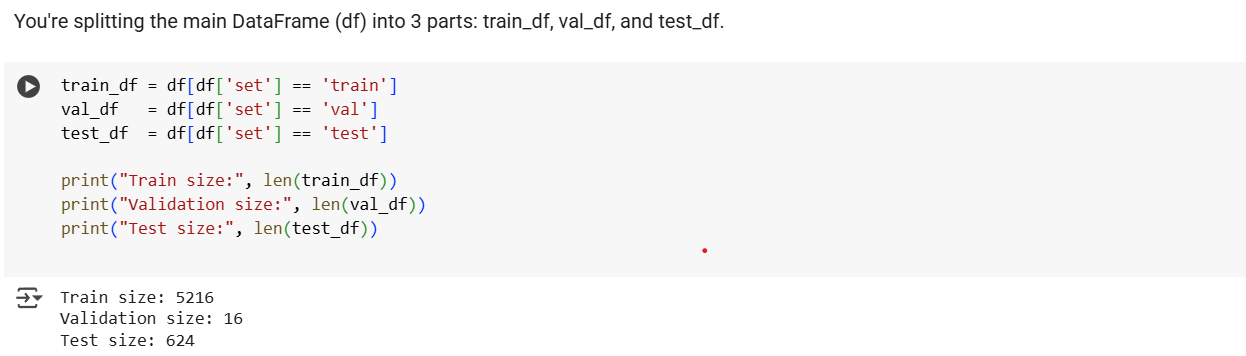

# ***Create Data Generators from train_df, val_df, test_df***

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#creating the image generators

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Use flow_from_dataframe to load images

train_df['label'] = train_df['label'].astype(str)
val_df['label'] = val_df['label'].astype(str)
test_df['label'] = test_df['label'].astype(str)



train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
)



val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepath',
    y_col='label',
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)



Found 4099 validated image filenames belonging to 3 classes.
Found 878 validated image filenames belonging to 3 classes.
Found 879 validated image filenames belonging to 3 classes.


# ***Data Augmentation***


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Augmentation for Training Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.01,
    zoom_range=[0.9, 1.25],
    horizontal_flip=True,
    fill_mode='nearest'
)

# 2. Validation & Test Data: Only Rescaling
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


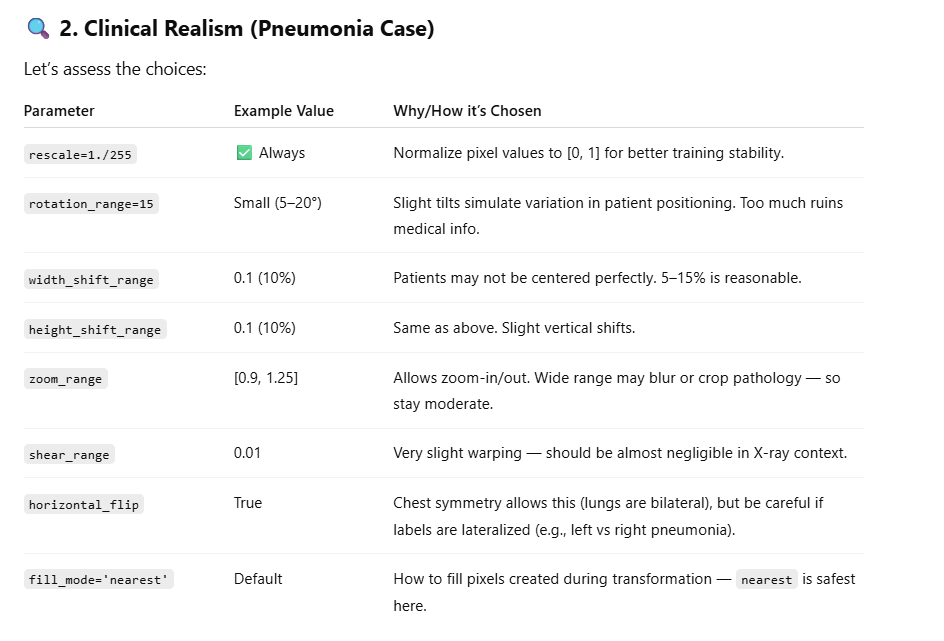

# ***Add Class Weights in model.fit***

In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',                   # Use automatic balancing
    classes=np.unique(train_df['label']),      # ['NORMAL', 'PNEUMONIA']
    y=train_df['label']                        # Target variable
)

class_weights_dict = dict(enumerate(class_weights))


In [ ]:
# Assuming you've already defined these:
# - train_datagen, val_datagen, test_datagen
# - train_df, val_df, test_df
# - Each df has columns: 'filepath' and 'label'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
IMG_SIZE = (180, 180)
BATCH_SIZE = 32

# Training Generator (with augmentation)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

# Validation Generator (no augmentation)
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Test Generator (no augmentation)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 4099 validated image filenames belonging to 3 classes.
Found 878 validated image filenames belonging to 3 classes.
Found 879 validated image filenames belonging to 3 classes.


In [ ]:
# Check for null values in each dataframe
print("🔍 Checking for missing values...\n")

print("Train DF:")
print(train_df.isnull().sum())

print("\nValidation DF:")
print(val_df.isnull().sum())

print("\nTest DF:")
print(test_df.isnull().sum())


🔍 Checking for missing values...

Train DF:
filepath    0
label       0
set         0
dtype: int64

Validation DF:
filepath    0
label       0
set         0
dtype: int64

Test DF:
filepath    0
label       0
set         0
dtype: int64


In [ ]:
# Drop rows with any missing values in the entire DataFrame
train_df.dropna(inplace=True)
val_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# ***MODEL FITTING***

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(2, 2),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(3, activation='softmax')  # ✅ 3 output neurons
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# checkpoint = ModelCheckpoint(
#     '/content/drive/MyDrive/Pneumonia-Detection/models/best_model.keras',  # Drive path
#     save_best_only=True,
#     monitor='val_loss',
#     verbose=1
# )



In [ ]:
# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     class_weight=class_weights_dict,
#     callbacks=[early_stopping, checkpoint],
#     epochs=25
# )


***We downloaded the best model in our local file after saving in it drive***

In [ ]:
from tensorflow.keras.models import load_model

# Path where you saved it (as per your earlier code)
model_path = '/content/drive/MyDrive/Pneumonia-Detection/models/best_model.keras'

# Try loading
model = load_model(model_path)

# Print summary to verify it's successfully loaded
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 89, 89, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 43, 43, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,943,883 (76.08 MB)

 Trainable params: 6,647,811 (25.36 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 13,295,624 (50.72 MB)

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Pneumonia-Detection/models/best_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/best_model.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 89, 89, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 43, 43, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,943,883 (76.08 MB)

 Trainable params: 6,647,811 (25.36 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 13,295,624 (50.72 MB)

# ***Plotting the training Curve***

In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")


28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 441ms/step - accuracy: 0.7983 - loss: 0.4883
Test Accuracy: 77.82%


In [ ]:
from sklearn.metrics import roc_auc_score

# Ground truth class indices (e.g., [0, 2, 1, 0, ...])
y_true = test_generator.classes

# Predicted class probabilities (shape: [N_samples, 3])
y_pred = model.predict(test_generator)

# Calculate multi-class AUC using One-vs-Rest strategy
auc = roc_auc_score(y_true, y_pred, multi_class='ovr')  # or 'ovo'
print(f"Multi-class AUC: {auc:.4f}")


28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 413ms/step
Multi-class AUC: 0.8991


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns

In [ ]:
# Step 1: Reset val_gen and get true labels
val_gen.reset()
Y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

# Step 2: Predict class probabilities and labels
Y_pred_probs = model.predict(val_gen, verbose=1)
Y_pred = np.argmax(Y_pred_probs, axis=1)

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(Y_true, Y_pred_probs, multi_class='ovr')
print(f"AUC (OvR): {auc:.4f}")


In [ ]:
# Step 3: Classification Report
print("📝 Classification Report:\n")
print(classification_report(Y_true, Y_pred, target_names=class_labels))


In [ ]:
# Step 4: Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Step 5: ROC Curve for Multi-Class (OvR)
Y_true_bin = label_binarize(Y_true, classes=range(len(class_labels)))  # One-hot encoding
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(Y_true_bin[:, i], Y_pred_probs[:, i])
    roc_auc[i] = roc_auc_score(Y_true_bin[:, i], Y_pred_probs[:, i])
# Plot all ROC curves
plt.figure(figsize=(7, 6))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f"{class_labels[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("📈 Multi-Class ROC Curve (One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.input_shape


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(model, img_path, class_names):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    preds = model.predict(img_array)
    pred_index = np.argmax(preds)
    pred_class = class_names[pred_index]
    confidence = preds[0][pred_index]

    print(f"Predicted Class: {pred_class} (Confidence: {confidence:.2f})")
    return pred_class, confidence


In [ ]:
class_names = ["bacterial", "viral", "normal"]
img_path = "/content/person81_virus_153.jpeg"

predict_image(model, img_path, class_names)


# ***Transfer Learning***

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
IMG_SIZE = (180, 180)
NUM_CLASSES = 3  # bacterial, viral, normal
BATCH_SIZE = 32


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = "/content/drive/MyDrive/Pneumonia-Detection/data/chest_xray/train"
val_dir = "/content/drive/MyDrive/Pneumonia-Detection/data/chest_xray/val"


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (180, 180)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 5216 images belonging to 3 classes.
Found 16 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(input_shape=(*IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze feature extractor

inputs = Input(shape=(*IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(3, activation='softmax')(x)  # 3 classes

model = Model(inputs, outputs)


/tmp/ipython-input-48-1049455336.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(*IMG_SIZE, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 6, 6, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# history = model.fit(
#     train_generator,
#     validation_data=val_generator,
#     epochs=10  # or more if needed
# )


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.4434 - loss: 1.2376 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 2112s 13s/step - accuracy: 0.4438 - loss: 1.2366 - val_accuracy: 0.6250 - val_loss: 0.7813
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 599ms/step - accuracy: 0.6177 - loss: 0.8595 - val_accuracy: 0.6250 - val_loss: 0.7285
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 99s 605ms/step - accuracy: 0.6538 - loss: 0.7721 - val_accuracy: 0.7500 - val_loss: 0.6522
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 595ms/step - accuracy: 0.6829 - loss: 0.7150 - val_accuracy: 0.5625 - val_loss: 0.7564
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 595ms/step - accuracy: 0.6929 - loss: 0.7000 - val_accuracy: 0.5625 - val_loss: 0.7324
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 595ms/step - accuracy: 0.7060 - loss: 0.6824 - val_accuracy: 0.5625 - val_loss: 0.7313
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 601ms/step - accuracy: 0.7225 - loss: 0.6679 - val_accuracy: 0.5625 - val_loss: 0.7508
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 603ms/step - accuracy: 0.7151 - loss: 0.6579 - va

In [ ]:
# model.save('/content/drive/MyDrive/pneumonia_transfer_model.keras')


In [ ]:
model = load_model('/content/drive/MyDrive/pneumonia_transfer_model.keras')

In [ ]:
# Comment this after saving
# history = model.fit(...)

# Use this after training is done
with open('/content/drive/MyDrive/pneumonia_history.pkl', 'rb') as f:
    history_dict = pickle.load(f)
history = DummyHistory(history_dict)


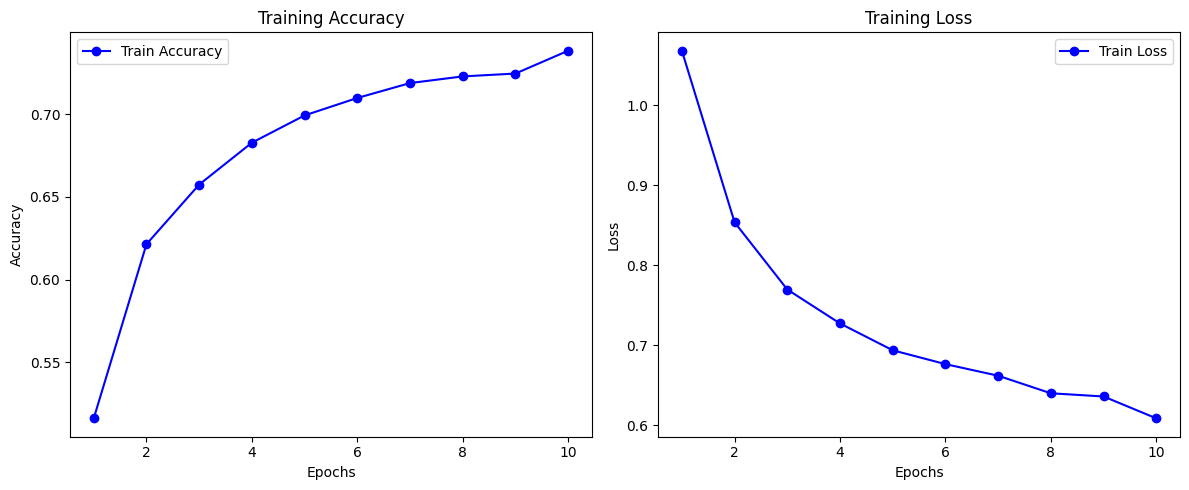

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Plot Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Train Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Predict class probabilities on test set
y_test_pred_probs = model.predict(test_generator)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# Get true labels
y_test_true = test_generator.classes


28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step


In [ ]:
from sklearn.metrics import classification_report

# Get class names (same as test_generator.classes mapping)
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_test_true, y_test_pred, target_names=class_names))


                     precision    recall  f1-score   support

BACTERIAL_PNEUMONIA       0.76      0.86      0.81       417
             NORMAL       0.84      0.94      0.89       238
    VIRAL_PNEUMONIA       0.71      0.46      0.55       224

           accuracy                           0.78       879
          macro avg       0.77      0.75      0.75       879
       weighted avg       0.77      0.78      0.77       879



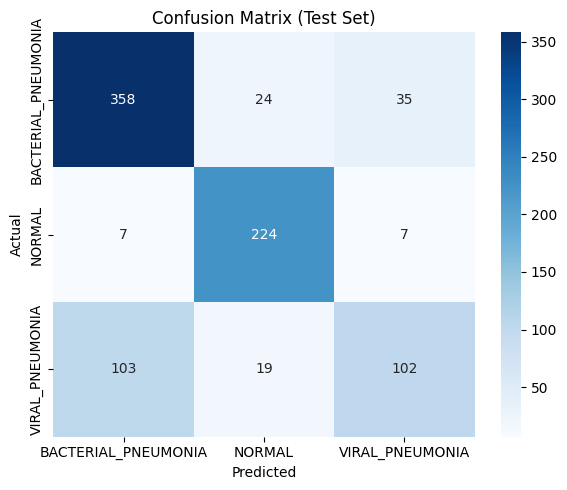

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_true, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Predict test set labels
y_test_pred_probs = model.predict(test_generator)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)
y_test_true = test_generator.classes

# ✅ Calculate overall test accuracy
test_accuracy = accuracy_score(y_test_true, y_test_pred)

print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")


28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 377ms/step
✅ Test Accuracy: 77.82%
